In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
data = [
    {
        'model': 'random',
        'checkpoint': 'N/A',
        'r1': 15.16,
        'r2': 1.78,
        'r3': 11.27
    },
    {
        'model': 'LEAD',
        'checkpoint': 'N/A',
        'r1': 16.3,
        'r2': 1.6,
        'r3': 11.95
    },
    {
        'model': 'T-CONVS2S',
        'checkpoint': 'N/A',
        'r1': 31.89,
        'r2': 11.54,
        'r3': 25.75
    },
    {
        'model': 'T5-base',
        'checkpoint': 'off-the-shelf',
        'r1': 31.89,
        'r2': 11.54,
        'r3': 25.75
    },
    {
        'model': 'T5-base',
        'checkpoint': 'SFT',
        'r1': 31.8,
        'r2': 11,
        'r3': 24.02
    },
    {
        'model': 'T5-base',
        'checkpoint': 'RLAIF',
        'r1': 40,
        'r2': 15,
        'r3': 29
    },
    {
        'model': 'GPT-2-medium',
        'checkpoint': 'off-the-shelf',
        'r1': 1,
        'r2': 2,
        'r3': 5
    },
    {
        'model': 'GPT-2-medium',
        'checkpoint': 'SFT',
        'r1': 30.9,
        'r2': 10.36,
        'r3': 24.69
    },
    {
        'model': 'GPT-2-medium',
        'checkpoint': 'RLAIF',
        'r1': 40,
        'r2': 15,
        'r3': 29
    },
]

df = pd.DataFrame.from_dict(data)
df


,model,checkpoint,r1,r2,r3
0,random,N/A,15.16,1.78,11.27
1,LEAD,N/A,16.30,1.60,11.95
2,T-CONVS2S,N/A,31.89,11.54,25.75
3,T5-base,off-the-shelf,31.89,11.54,25.75
4,T5-base,SFT,31.80,11.00,24.02
5,T5-base,RLAIF,40.00,15.00,29.00
6,GPT-2-medium,off-the-shelf,1.00,2.00,5.00
7,GPT-2-medium,SFT,30.90,10.36,24.69
8,GPT-2-medium,RLAIF,40.00,15.00,29.00


In [12]:
df_long = pd.wide_to_long(df, stubnames='r', i=['model', 'checkpoint'], j='ROUGE_type').reset_index()
df_long

,model,checkpoint,ROUGE_type,r
0,random,N/A,1,15.16
1,random,N/A,2,1.78
2,random,N/A,3,11.27
3,LEAD,N/A,1,16.30
4,LEAD,N/A,2,1.60
5,LEAD,N/A,3,11.95
6,T-CONVS2S,N/A,1,31.89
7,T-CONVS2S,N/A,2,11.54
8,T-CONVS2S,N/A,3,25.75
9,T5-base,off-the-shelf,1,31.89


/Users/toby/anaconda3/envs/maet-pln/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/toby/anaconda3/envs/maet-pln/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/toby/anaconda3/envs/maet-pln/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/toby/anaconda3/envs/maet-pln/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

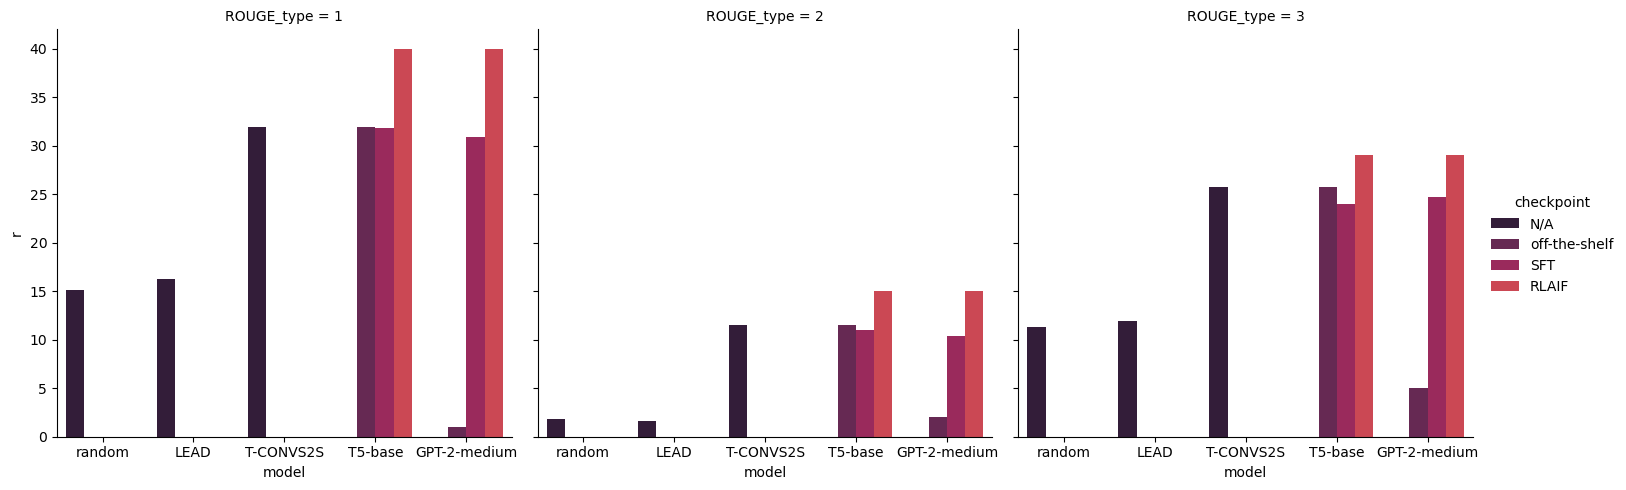

In [30]:

sns.catplot(
    df_long,
    kind='bar',
    col='ROUGE_type',
    x='model',
    y='r',
    hue='checkpoint',
    palette=sns.color_palette("rocket")
    # palette=sns.color_palette("Reds")
)